Name:Subhasmita achary
Gmail: subhasmitaachary628@gmail.com
Subject:Regression & Its Evaluation(Assignment)


Question 6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data

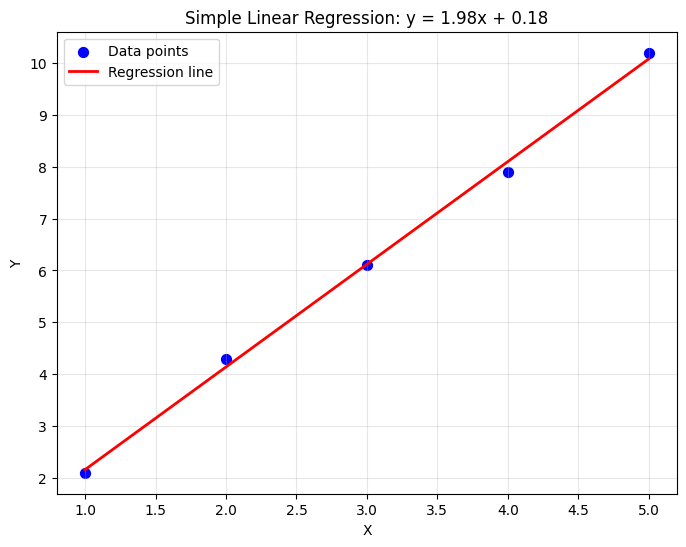

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Fit the model
model = LinearRegression()
model.fit(X, Y)

# Predictions for regression line
Y_pred = model.predict(X)

# Plot data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Data points', s=50)
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression: y = 1.98x + 0.18')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Q.7Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Sample data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}
df = pd.DataFrame(data)

display(df.head())

,Area,Rooms,Price
0,1200,2,250000
1,1500,3,300000
2,1800,3,320000
3,2000,4,370000


### Fitting the Multiple Linear Regression Model

In [3]:
# Define independent variables (X) and dependent variable (Y)
X = df[['Area', 'Rooms']]
Y = df['Price']

# Fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Print the coefficients and intercept
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"Equation: Price = {model.intercept_:.2f} + {model.coef_[0]:.2f} * Area + {model.coef_[1]:.2f} * Rooms")

Intercept: 103157.89473684214
Coefficients: [   63.15789474 34736.84210526]
Equation: Price = 103157.89 + 63.16 * Area + 34736.84 * Rooms


### Checking for Multicollinearity using VIF (Variance Inflation Factor)

In [4]:
# Add a constant to the independent variables for VIF calculation
X_const = add_constant(X)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Display the VIF results
print("VIF Results:")
display(vif_data)

print("\nInterpretation of VIF values:")
print("- VIF = 1: No correlation between the variable and any other variables.")
print("- 1 < VIF < 5: Moderate correlation, generally considered acceptable.")
print("- VIF >= 5: High correlation, indicating potential multicollinearity issues.")

VIF Results:


,feature,VIF
0,const,34.210526
1,Area,7.736842
2,Rooms,7.736842



Interpretation of VIF values:
- VIF = 1: No correlation between the variable and any other variables.
- 1 < VIF < 5: Moderate correlation, generally considered acceptable.
- VIF >= 5: High correlation, indicating potential multicollinearity issues.


Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
3
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.

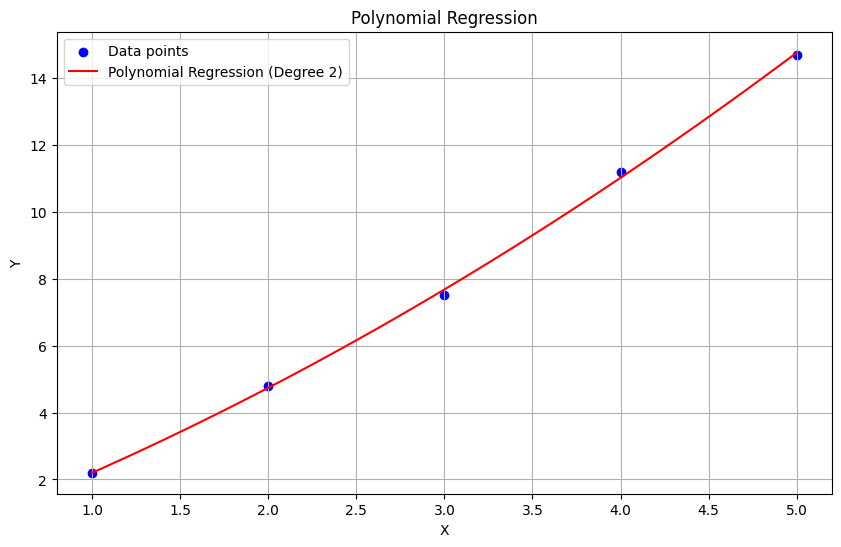

Polynomial Regression Coefficients: [0.   1.94 0.2 ]
Polynomial Regression Intercept: 0.06000000000000938


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform X to polynomial features (e.g., degree 2 for quadratic)
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Fit a Linear Regression model to the polynomial features
model_poly = LinearRegression()
model_poly.fit(X_poly, Y)

# Generate points for the regression line
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
Y_plot_pred = model_poly.predict(X_plot_poly)

# Plot the original data and the polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X_plot, Y_plot_pred, color='red', label=f'Polynomial Regression (Degree {degree})')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

print(f"Polynomial Regression Coefficients: {model_poly.coef_}")
print(f"Polynomial Regression Intercept: {model_poly.intercept_}")

Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.

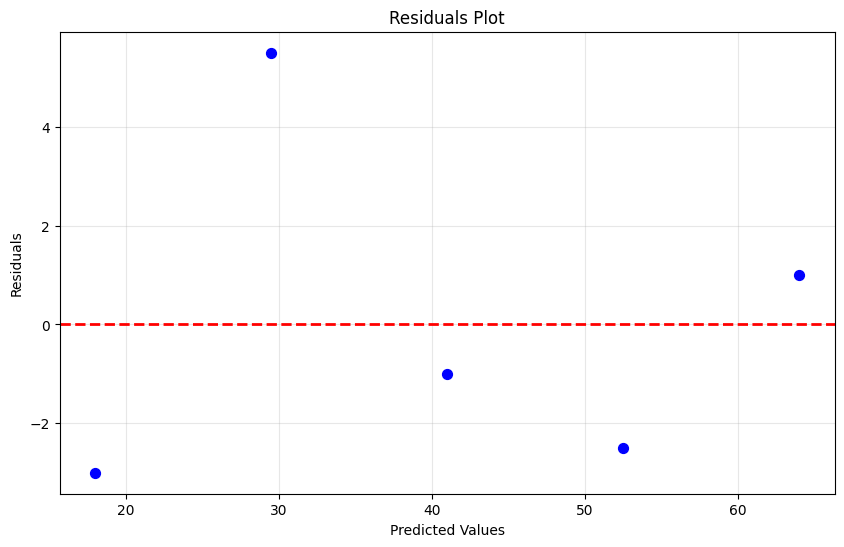

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit a Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Make predictions
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Create the residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals, color='blue', s=50)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True, alpha=0.3)
plt.show()


### Assessing Heteroscedasticity from the Residuals Plot

To assess heteroscedasticity, examine the spread of the residuals along the x-axis (predicted values):

*   **Homoscedasticity (Desirable)**: If the residuals are evenly spread around the horizontal line at zero, with no clear pattern, and the variance of the residuals is constant across all predicted values, then the assumption of homoscedasticity holds. The points would look like a random cloud.

*   **Heteroscedasticity (Undesirable)**: If the spread of the residuals changes as the predicted values change (e.g., they fan out or funnel in, forming a cone shape, or show a specific pattern like a curve), it indicates heteroscedasticity. This means the variance of the errors is not constant, which can lead to biased standard errors and incorrect hypothesis tests.

Look for any systematic patterns or changes in the vertical spread of the points as you move from left to right on the plot.

Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.


Answer:
To address heteroscedasticity and multicollinearity in a house price prediction regression model using features like area, number of rooms, and location, first confirm these issues with diagnostic tests. Heteroscedasticity shows unequal residual variance, while multicollinearity indicates high correlation between predictors. Targeted fixes ensure reliable coefficient estimates and predictions.

Diagnosing Issues
Run Breusch-Pagan or White's test for heteroscedasticity, checking residual plots for fanning patterns. For multicollinearity, compute Variance Inflation Factor (VIF); values over 5-10 signal problems, such as between area and rooms.

Fixing Heteroscedasticity
Apply log transformation to the target (log(price)) and skewed features like area to stabilize variance. Use Weighted Least Squares (WLS) with weights as inverse residual variance, or add robust standard errors (e.g., HC3) for unbiased inference.

Fixing Multicollinearity
Drop high-VIF features or combine them via Principal Component Analysis (PCA). Apply Ridge or Lasso regression to penalize correlated predictors, shrinking coefficients appropriately.

Ensuring Model Robustness
Perform k-fold cross-validation to evaluate R² and RMSE. Switch to tree-based models like Random Forest or XGBoost, which handle these issues inherently. Re-check residuals and assumptions post-fixes.